# Experiment Notebook
This notebook is created for experimentation and testing in the `_sandbox` folder.

In [1]:
# Import Required Libraries
import numpy as np
import pickle
import os
import pprint as pp

samples_dir = "/home/mg873uh/Projects_kb/data/pretrain_preproc/FOMO60k"

In [2]:
# List 50 random .npy samples and their dimensions
npy_files = [f for f in os.listdir(samples_dir) if f.endswith('.npy')]
random_samples = np.random.choice(npy_files, size=50, replace=False)

sample_dimensions = {}
for sample in random_samples:
    sample_path = os.path.join(samples_dir, sample)
    data = np.load(sample_path)
    sample_dimensions[sample] = data.shape

print("Random .npy samples and their dimensions:")
pp.pprint(sample_dimensions)

Random .npy samples and their dimensions:
{'sub_1025_ses_1_swi.npy': (192, 190, 60),
 'sub_10363_ses_2_t1_4.npy': (138, 176, 136),
 'sub_1043_ses_1_dwi.npy': (173, 223, 162),
 'sub_10721_ses_1_t2.npy': (137, 179, 144),
 'sub_10902_ses_1_dwi.npy': (176, 186, 137),
 'sub_116_ses_1_t1.npy': (155, 231, 199),
 'sub_1552_ses_2_dwi_2.npy': (123, 168, 142),
 'sub_1651_ses_1_scan_17.npy': (144, 161, 143),
 'sub_1698_ses_1_scan_4.npy': (143, 169, 149),
 'sub_1710_ses_1_flair.npy': (126, 164, 141),
 'sub_1820_ses_1_t1_2.npy': (136, 165, 137),
 'sub_1893_ses_1_pd.npy': (138, 185, 154),
 'sub_2708_ses_1_t1.npy': (160, 256, 256),
 'sub_2871_ses_1_scan_5.npy': (145, 175, 157),
 'sub_3268_ses_1_scan_17.npy': (140, 188, 155),
 'sub_3325_ses_1_flair.npy': (148, 162, 150),
 'sub_3552_ses_1_t1.npy': (176, 250, 250),
 'sub_3557_ses_1_t1.npy': (132, 167, 148),
 'sub_3578_ses_1_scan_8.npy': (151, 166, 166),
 'sub_3756_ses_2_t1_4.npy': (154, 192, 60),
 'sub_3890_ses_1_t2.npy': (143, 162, 139),
 'sub_4074_ses_

In [5]:

pkl_sample_name= "sub_10000_ses_1_flair.pkl"

pkl_sample_path = os.path.join(samples_dir, pkl_sample_name)
with open(pkl_sample_path, "rb") as f:
    pkl_data = pickle.load(f)
print("Loaded .pkl file: ")
pp.pprint(pkl_data)

Loaded .pkl file: 
{'crop_to_nonzero': [49, 196, 22, 201, 0, 142],
 'foreground_locations': [],
 'label_cc_n': 0,
 'label_cc_sizes': 0,
 'new_direction': 'RAS',
 'new_size': [148, 180, 143],
 'new_spacing': [1.0, 1.0, 1.0],
 'nifti_metadata': {'affine': array([[   1.,    0.,    0., -240.],
       [   0.,    1.,    0.,   -1.],
       [   0.,    0.,    1.,    0.],
       [   0.,    0.,    0.,    1.]]),
                    'final_direction': 'RAS',
                    'header': None,
                    'original_orientation': 'RAS',
                    'original_spacing': [1.0, 1.0, 1.0],
                    'reoriented': True},
 'original_orientation': 'RAS',
 'original_size': (240, 240, 155),
 'original_spacing': [1.0, 1.0, 1.0],
 'size_after_transpose': [148, 180, 143],
 'size_before_transpose': [148, 180, 143]}


Analyzing file: /home/mg873uh/Projects_kb/data/pretrain_preproc/FOMO60k/sub_1130_ses_2_t1_4.npy
Data shape: (174, 188, 60)
Data type: float32
Min value: 0.0000
Max value: 1.0000
Mean value: 0.0923
Std deviation: 0.1750


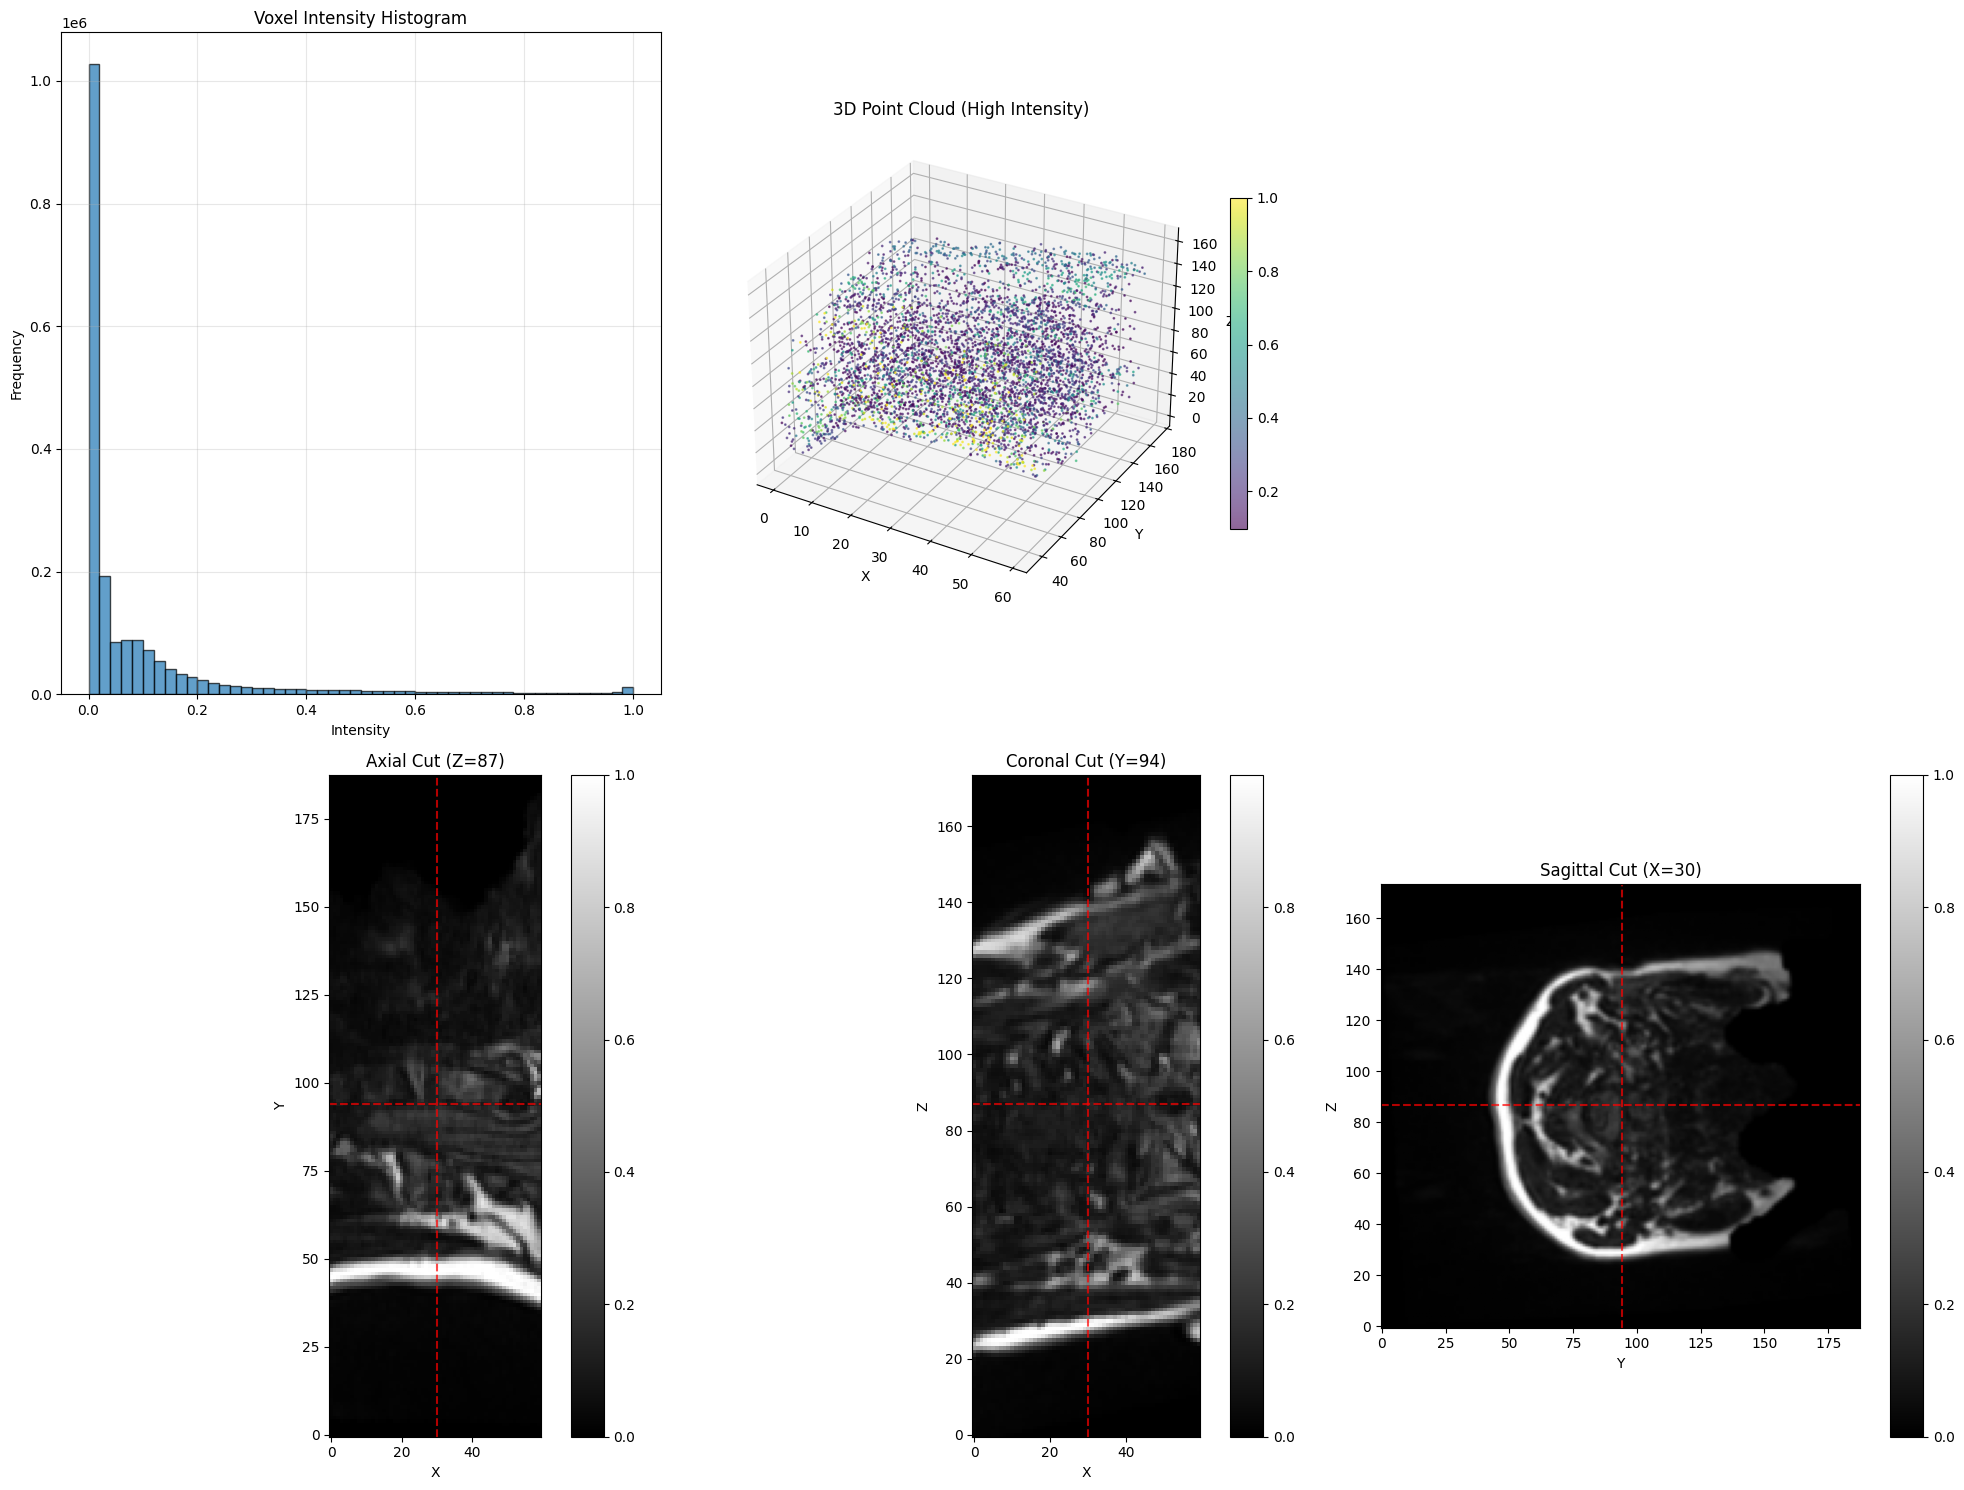


Center point for orthogonal cuts: (30, 94, 87)


In [2]:
# Analysis of .npy files
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def analyze_npy_file(npy_path):
    """
    Analyze a .npy file containing image data.
    - Display image information (dimensions, intensity histogram)
    - For 3D data: show 3D point cloud and orthogonal cuts (MPRs)
    """
    # Load the data
    data = np.load(npy_path)
    print(f"Analyzing file: {npy_path}")
    print(f"Data shape: {data.shape}")
    print(f"Data type: {data.dtype}")
    print(f"Min value: {data.min():.4f}")
    print(f"Max value: {data.max():.4f}")
    print(f"Mean value: {data.mean():.4f}")
    print(f"Std deviation: {data.std():.4f}")

    # Create figure with subplots
    if len(data.shape) == 3:
        fig = plt.figure(figsize=(20, 15))

        # 1. Intensity histogram
        plt.subplot(2, 3, 1)
        plt.hist(data.flatten(), bins=50, alpha=0.7, edgecolor='black')
        plt.title('Voxel Intensity Histogram')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)

        # 2. 3D point cloud (sample points for performance)
        ax_3d = fig.add_subplot(2, 3, 2, projection='3d')

        # Sample points to avoid overwhelming the plot
        z, y, x = np.where(data > np.percentile(data, 75))  # Show only high-intensity points
        sample_indices = np.random.choice(len(x), min(5000, len(x)), replace=False)
        x_sample = x[sample_indices]
        y_sample = y[sample_indices]
        z_sample = z[sample_indices]
        colors = data[z_sample, y_sample, x_sample]

        scatter = ax_3d.scatter(x_sample, y_sample, z_sample, c=colors,
                               cmap='viridis', alpha=0.6, s=1)
        ax_3d.set_title('3D Point Cloud (High Intensity)')
        ax_3d.set_xlabel('X')
        ax_3d.set_ylabel('Y')
        ax_3d.set_zlabel('Z')
        plt.colorbar(scatter, ax=ax_3d, shrink=0.5)

        # Calculate center point for orthogonal cuts
        center_z, center_y, center_x = data.shape[0]//2, data.shape[1]//2, data.shape[2]//2

        # 3. Axial cut (XY plane)
        plt.subplot(2, 3, 4)
        plt.imshow(data[center_z, :, :], cmap='gray', origin='lower')
        plt.title(f'Axial Cut (Z={center_z})')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.colorbar()
        # Add crosshairs
        plt.axhline(y=center_y, color='red', linestyle='--', alpha=0.7)
        plt.axvline(x=center_x, color='red', linestyle='--', alpha=0.7)

        # 4. Coronal cut (XZ plane)
        plt.subplot(2, 3, 5)
        plt.imshow(data[:, center_y, :], cmap='gray', origin='lower')
        plt.title(f'Coronal Cut (Y={center_y})')
        plt.xlabel('X')
        plt.ylabel('Z')
        plt.colorbar()
        # Add crosshairs
        plt.axhline(y=center_z, color='red', linestyle='--', alpha=0.7)
        plt.axvline(x=center_x, color='red', linestyle='--', alpha=0.7)

        # 5. Sagittal cut (YZ plane)
        plt.subplot(2, 3, 6)
        plt.imshow(data[:, :, center_x], cmap='gray', origin='lower')
        plt.title(f'Sagittal Cut (X={center_x})')
        plt.xlabel('Y')
        plt.ylabel('Z')
        plt.colorbar()
        # Add crosshairs
        plt.axhline(y=center_z, color='red', linestyle='--', alpha=0.7)
        plt.axvline(x=center_y, color='red', linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()

        print(f"\nCenter point for orthogonal cuts: ({center_x}, {center_y}, {center_z})")

    else:
        print(f"Unsupported data dimensions: {len(data.shape)}D")


npy_sample_name= "sub_1130_ses_2_t1_4.npy"
npy_sample_path = os.path.join(samples_dir, npy_sample_name)
analyze_npy_file(npy_sample_path)



In [ ]:
# Explore session structure and create interactive session comparison



Found 13900 sessions:
  sub_5456_ses_1: 4 files - ['sub_5456_ses_1_flair.npy', 'sub_5456_ses_1_dwi.npy', 'sub_5456_ses_1_dwi_2.npy', 'sub_5456_ses_1_t1.npy']
  sub_5806_ses_1: 4 files - ['sub_5806_ses_1_t1.npy', 'sub_5806_ses_1_dwi_2.npy', 'sub_5806_ses_1_flair.npy', 'sub_5806_ses_1_dwi.npy']
  sub_10056_ses_1: 4 files - ['sub_10056_ses_1_flair.npy', 'sub_10056_ses_1_dwi.npy', 'sub_10056_ses_1_t1.npy', 'sub_10056_ses_1_dwi_2.npy']
  sub_5244_ses_1: 4 files - ['sub_5244_ses_1_dwi_2.npy', 'sub_5244_ses_1_dwi.npy', 'sub_5244_ses_1_flair.npy', 'sub_5244_ses_1_t1.npy']
  sub_959_ses_1: 3 files - ['sub_959_ses_1_t2.npy', 'sub_959_ses_1_t1.npy', 'sub_959_ses_1_dwi.npy']

Total sessions: 13900

Session with most files: sub_10756_ses_1
Files: ['sub_10756_ses_1_scan_27.npy', 'sub_10756_ses_1_scan_3.npy', 'sub_10756_ses_1_scan_9.npy', 'sub_10756_ses_1_scan_24.npy', 'sub_10756_ses_1_scan_21.npy', 'sub_10756_ses_1_scan_15.npy', 'sub_10756_ses_1_scan_25.npy', 'sub_10756_ses_1_scan_5.npy', 'sub_10756

In [2]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from collections import defaultdict

def get_session_files():
    """
    Group files by session (prefix pattern like sub_7373_ses_1).
    Returns a dictionary with session as key and list of files as value.
    """
    import re
    npy_files = [f for f in os.listdir(samples_dir) if f.endswith('.npy')]

    sessions = defaultdict(list)
    for file in npy_files:
        # Extract session using regex pattern: sub_{integer}_ses_{integer}
        # Pattern: sub_XXXX_ses_X_modality.npy -> sub_XXXX_ses_X
        match = re.match(r'(sub_\d+_ses_\d+)_', file)
        if match:
            session = match.group(1)
            sessions[session].append(file)
        else:
            # Handle files that don't match the expected pattern
            print(f"Warning: File '{file}' doesn't match expected pattern sub_{{int}}_ses_{{int}}_*")

    return dict(sessions)

sessions = get_session_files()

def pad_to_same_shape(img1, img2):
    """
    Pad both images to the same shape by padding with zeros.
    Returns padded versions of both images.
    """
    # Get maximum dimensions
    max_shape = tuple(max(s1, s2) for s1, s2 in zip(img1.shape, img2.shape))

    def pad_image(img, target_shape):
        pad_widths = []
        for i in range(len(target_shape)):
            diff = target_shape[i] - img.shape[i]
            pad_before = diff // 2
            pad_after = diff - pad_before
            pad_widths.append((pad_before, pad_after))
        return np.pad(img, pad_widths, mode='constant', constant_values=0)

    img1_padded = pad_image(img1, max_shape)
    img2_padded = pad_image(img2, max_shape)

    return img1_padded, img2_padded, max_shape

def compare_session_coregistration(session_name, file1_name, file2_name):
    """
    Compare two co-registered images from the same session showing sagittal, coronal, and axial cuts.
    Always takes cuts at the center of the images without any alignment intervention.
    """
    file1_path = os.path.join(samples_dir, file1_name)
    file2_path = os.path.join(samples_dir, file2_name)

    # Load the images
    img1 = np.load(file1_path)
    img2 = np.load(file2_path)

    print(f"Session: {session_name}")
    print(f"Image 1: {file1_name}")
    print(f"  Original shape: {img1.shape}")
    print(f"  Data type: {img1.dtype}")
    print(f"  Value range: [{img1.min():.4f}, {img1.max():.4f}]")

    print(f"\nImage 2: {file2_name}")
    print(f"  Original shape: {img2.shape}")
    print(f"  Data type: {img2.dtype}")
    print(f"  Value range: [{img2.min():.4f}, {img2.max():.4f}]")

    # Pad images to same shape if needed
    if img1.shape != img2.shape:
        print(f"\nShapes differ - padding to common shape...")
        img1_padded, img2_padded, final_shape = pad_to_same_shape(img1, img2)
        print(f"Final padded shape: {final_shape}")
        img1, img2 = img1_padded, img2_padded
    else:
        print(f"\nShapes match: {img1.shape}")

    # Calculate center points (always at the center of the image)
    center_z, center_y, center_x = img1.shape[0]//2, img1.shape[1]//2, img1.shape[2]//2
    print(f"Center point for cuts: ({center_x}, {center_y}, {center_z})")

    # Create the comparison plot
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Co-registration Comparison - Session: {session_name}', fontsize=16)

    # Axial cuts (XY plane)
    im1 = axes[0, 0].imshow(img1[center_z, :, :], cmap='gray', origin='lower')
    axes[0, 0].set_title(f'{file1_name} - Axial (Z={center_z})')
    axes[0, 0].set_xlabel('X')
    axes[0, 0].set_ylabel('Y')
    plt.colorbar(im1, ax=axes[0, 0])

    im2 = axes[1, 0].imshow(img2[center_z, :, :], cmap='gray', origin='lower')
    axes[1, 0].set_title(f'{file2_name} - Axial (Z={center_z})')
    axes[1, 0].set_xlabel('X')
    axes[1, 0].set_ylabel('Y')
    plt.colorbar(im2, ax=axes[1, 0])

    # Coronal cuts (XZ plane)
    im3 = axes[0, 1].imshow(img1[:, center_y, :], cmap='gray', origin='lower')
    axes[0, 1].set_title(f'{file1_name} - Coronal (Y={center_y})')
    axes[0, 1].set_xlabel('X')
    axes[0, 1].set_ylabel('Z')
    plt.colorbar(im3, ax=axes[0, 1])

    im4 = axes[1, 1].imshow(img2[:, center_y, :], cmap='gray', origin='lower')
    axes[1, 1].set_title(f'{file2_name} - Coronal (Y={center_y})')
    axes[1, 1].set_xlabel('X')
    axes[1, 1].set_ylabel('Z')
    plt.colorbar(im4, ax=axes[1, 1])

    # Sagittal cuts (YZ plane)
    im5 = axes[0, 2].imshow(img1[:, :, center_x], cmap='gray', origin='lower')
    axes[0, 2].set_title(f'{file1_name} - Sagittal (X={center_x})')
    axes[0, 2].set_xlabel('Y')
    axes[0, 2].set_ylabel('Z')
    plt.colorbar(im5, ax=axes[0, 2])

    im6 = axes[1, 2].imshow(img2[:, :, center_x], cmap='gray', origin='lower')
    axes[1, 2].set_title(f'{file2_name} - Sagittal (X={center_x})')
    axes[1, 2].set_xlabel('Y')
    axes[1, 2].set_ylabel('Z')
    plt.colorbar(im6, ax=axes[1, 2])

    # Add crosshairs to all plots to show the center cuts
    for i in range(2):
        # Axial
        axes[i, 0].axhline(y=center_y, color='red', linestyle='--', alpha=0.7, linewidth=1)
        axes[i, 0].axvline(x=center_x, color='red', linestyle='--', alpha=0.7, linewidth=1)

        # Coronal
        axes[i, 1].axhline(y=center_z, color='red', linestyle='--', alpha=0.7, linewidth=1)
        axes[i, 1].axvline(x=center_x, color='red', linestyle='--', alpha=0.7, linewidth=1)

        # Sagittal
        axes[i, 2].axhline(y=center_z, color='red', linestyle='--', alpha=0.7, linewidth=1)
        axes[i, 2].axvline(x=center_y, color='red', linestyle='--', alpha=0.7, linewidth=1)

    plt.tight_layout()
    plt.show()

    return img1, img2

In [9]:
def create_interactive_comparison():
    """
    Create interactive widgets for selecting session and comparing two files within that session.
    """
    # Session input
    session_dropdown = widgets.Text(
        value=list(sessions.keys())[0] if sessions else '',
        description='Session:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='400px')
    )

    # File dropdowns (will be updated based on session selection)
    file1_dropdown = widgets.Dropdown(
        options=[],
        description='Image 1:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='400px')
    )

    file2_dropdown = widgets.Dropdown(
        options=[],
        description='Image 2:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='400px')
    )

    # Compare button
    compare_button = widgets.Button(
        description='Compare Co-registration',
        button_style='primary',
        layout=widgets.Layout(width='200px')
    )

    # Output area
    output = widgets.Output()

    def update_file_options(change):
        """Update file dropdown options when session changes."""
        selected_session = change['new']
        if selected_session in sessions:
            files = sessions[selected_session]
            file1_dropdown.options = files
            file2_dropdown.options = files
            # Set default selections if available
            if len(files) >= 2:
                file1_dropdown.value = files[0]
                file2_dropdown.value = files[1]
            elif len(files) == 1:
                file1_dropdown.value = files[0]
                file2_dropdown.value = files[0]
        else:
            # Clear options if session doesn't exist
            file1_dropdown.options = []
            file2_dropdown.options = []

    def on_compare_click(b):
        """Handle compare button click."""
        with output:
            clear_output()
            if session_dropdown.value not in sessions:
                print(f"Error: Session '{session_dropdown.value}' not found.")
                print(f"Available sessions: {list(sessions.keys())[:10]}...")  # Show first 10
                return

            if file1_dropdown.value and file2_dropdown.value:
                if file1_dropdown.value == file2_dropdown.value:
                    print("Warning: Same file selected for both images. Comparison will show identical images.")
                try:
                    compare_session_coregistration(
                        session_dropdown.value,
                        file1_dropdown.value,
                        file2_dropdown.value
                    )
                except Exception as e:
                    print(f"Error during comparison: {str(e)}")
            else:
                print("Please select both images to compare.")

    # Set up event handlers
    session_dropdown.observe(update_file_options, names='value')
    compare_button.on_click(on_compare_click)

    # Initialize file options for the first session
    if sessions:
        update_file_options({'new': session_dropdown.value})

    # Display the interface
    print("Interactive Co-registration Comparison Tool")
    print("=" * 50)
    print("Select a session and two images to compare their co-registration:")
    print()

    display(widgets.VBox([
        session_dropdown,
        widgets.HBox([file1_dropdown, file2_dropdown]),
        compare_button,
        output
    ]))

# Run the interactive comparison tool
create_interactive_comparison()

Interactive Co-registration Comparison Tool
Select a session and two images to compare their co-registration:

